In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel(r'D:/Semester 5/Jaringan Syaraf Tiruan/Multi-Layer-Perceptron/data/BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

In [4]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [5]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
0,0,0.0,483,1590,595,1,25,1044,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1128,254,595,1,1649,143,1.698797e+18,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,5.0,264,1660,406,0,372,824,1.698797e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,37,2009,406,1,28,946,1.669853e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.0,222,1013,295,0,3603,976,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3.701000e+03,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.00000,3701.000000,3701.000000,3701.000000
mean,1850.000000,3.627668,1665.487166,1396.319643,905.066739,0.311537,1845.307755,924.593083,-7.329317e+17,2.879222,...,0.173196,0.270197,0.107539,0.240746,0.208322,0.323696,0.52067,0.057552,0.097541,0.000540
std,1068.531001,3.094761,869.403991,838.782534,527.062164,0.463184,1065.214398,468.600891,4.381454e+18,1.340735,...,0.378468,0.444122,0.309839,0.427594,0.406163,0.467949,0.49964,0.232926,0.296733,0.023243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,925.000000,1.000000,897.000000,655.000000,457.000000,0.000000,923.000000,563.000000,1.438387e+18,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1850.000000,3.000000,1804.000000,1354.000000,888.000000,0.000000,1847.000000,962.000000,1.483229e+18,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,2775.000000,6.000000,2609.000000,2136.000000,1373.000000,1.000000,2767.000000,1454.000000,1.551398e+18,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,3700.000000,9.000000,2684.000000,2901.000000,1819.000000,1.000000,3691.000000,1542.000000,1.698797e+18,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [8]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

In [9]:
from sklearn.model_selection import train_test_split

features = data.drop(['Satisfaction'], axis=1)
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42, stratify=label, shuffle=True)

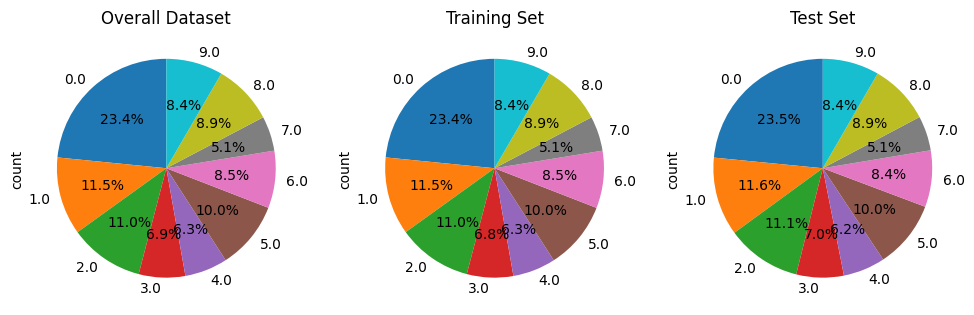

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

sorted_train = s_train['Satisfaction'].value_counts().sort_index()
sorted_test = s_test['Satisfaction'].value_counts().sort_index()
sorted_data = data['Satisfaction'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,-0.053196,-0.042544,-0.055706,-0.094923,-0.072955,0.000019,0.060171,0.065903,0.078334,0.040597,0.076577,0.157712,-0.341139,0.023674,0.016246,-0.039935,-0.032269,-0.016451
1,-0.053196,1.000000,0.594581,0.476571,0.680494,0.641432,0.581483,0.437649,0.235556,-0.130733,-0.050030,-0.013271,0.052451,0.129975,0.020035,-0.105862,0.146022,0.035192,-0.034311
2,-0.042544,0.594581,1.000000,0.462598,0.645761,0.649522,0.663100,0.359542,0.218784,-0.121094,-0.015043,-0.008890,0.026215,0.106949,0.099310,-0.122863,0.110052,-0.036092,-0.004066
3,-0.055706,0.476571,0.462598,1.000000,0.591288,0.553304,0.396400,0.258803,0.218779,-0.131688,0.009200,-0.022326,0.059440,0.065211,0.058713,-0.091635,0.054343,0.020390,-0.015922
4,-0.094923,0.680494,0.645761,0.591288,1.000000,0.799057,0.644759,0.389409,0.211914,-0.179549,-0.053717,-0.038004,0.038518,0.212387,0.037194,-0.059308,0.059412,-0.003146,-0.028076
5,-0.072955,0.641432,0.649522,0.553304,0.799057,1.000000,0.650527,0.394026,0.211953,-0.171770,-0.050867,-0.020437,0.048071,0.178671,0.075868,-0.087849,0.038319,-0.000280,-0.020242
6,0.000019,0.581483,0.663100,0.396400,0.644759,0.650527,1.000000,0.452487,0.242445,-0.139504,-0.026110,-0.022162,0.038569,0.133114,0.105001,-0.132810,0.089439,-0.011279,-0.013350
7,0.060171,0.437649,0.359542,0.258803,0.389409,0.394026,0.452487,1.000000,0.321332,-0.071616,0.036818,0.011061,0.068508,-0.055329,0.015413,-0.049379,0.067047,0.006732,-0.005325
8,0.065903,0.235556,0.218784,0.218779,0.211914,0.211953,0.242445,0.321332,1.000000,-0.036935,-0.004702,0.026599,-0.001429,0.020382,0.049410,-0.054080,-0.009725,0.020665,0.000974
9,0.078334,-0.130733,-0.121094,-0.131688,-0.179549,-0.171770,-0.139504,-0.071616,-0.036935,1.000000,-0.276494,-0.155063,-0.253058,-0.229964,0.119343,-0.097501,0.003640,-0.026426,-0.010987


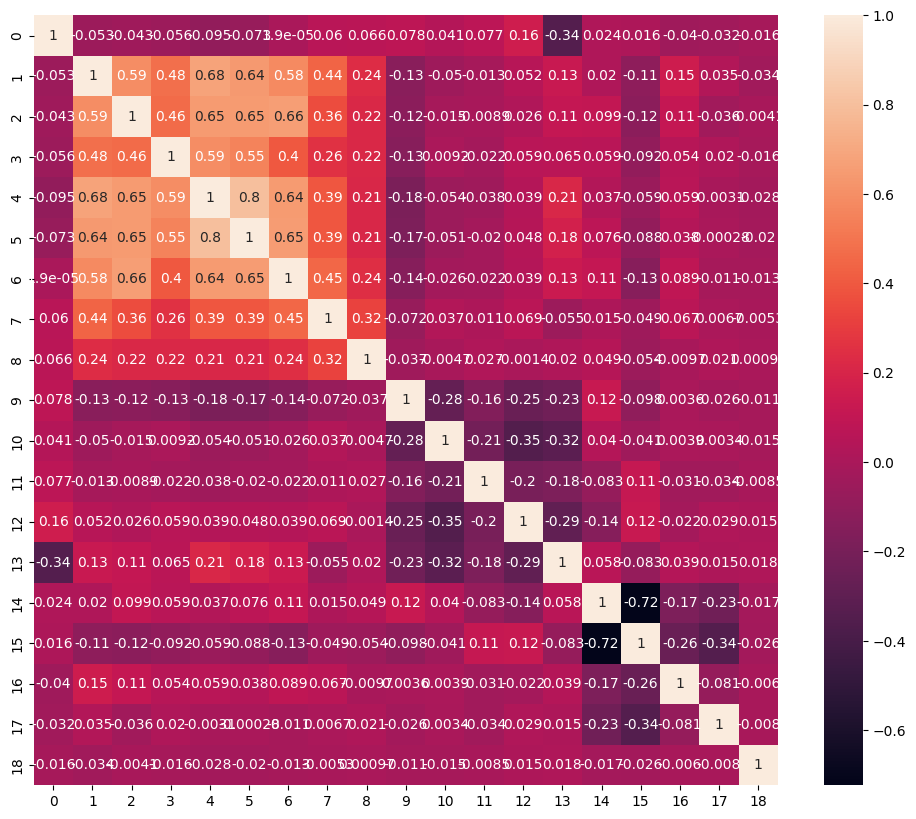

In [12]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


# Developing model

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


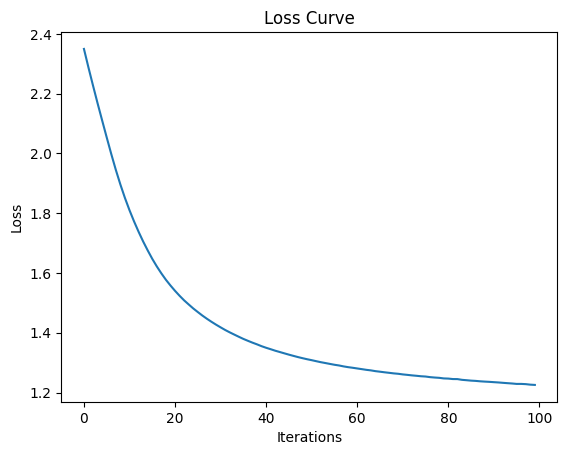

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
mlp.fit(x_train, y_train)
predict = mlp.predict(x_test)

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [16]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

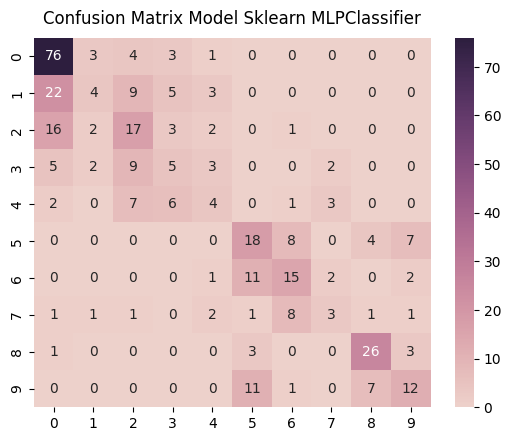

              precision    recall  f1-score     support
0.0            0.617886  0.873563  0.723810   87.000000
1.0            0.333333  0.093023  0.145455   43.000000
2.0            0.361702  0.414634  0.386364   41.000000
3.0            0.227273  0.192308  0.208333   26.000000
4.0            0.250000  0.173913  0.205128   23.000000
5.0            0.409091  0.486486  0.444444   37.000000
6.0            0.441176  0.483871  0.461538   31.000000
7.0            0.300000  0.157895  0.206897   19.000000
8.0            0.684211  0.787879  0.732394   33.000000
9.0            0.480000  0.387097  0.428571   31.000000
accuracy       0.485175  0.485175  0.485175    0.485175
macro avg      0.410467  0.405067  0.394293  371.000000
weighted avg   0.448922  0.485175  0.451050  371.000000
Mean Squared Error:  2.8274932614555257


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

confussion_matrix = confusion_matrix(y_test, predict)
plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

model1_report = classification_report(y_test, predict, output_dict=True)
print(pd.DataFrame(model1_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_test, predict))

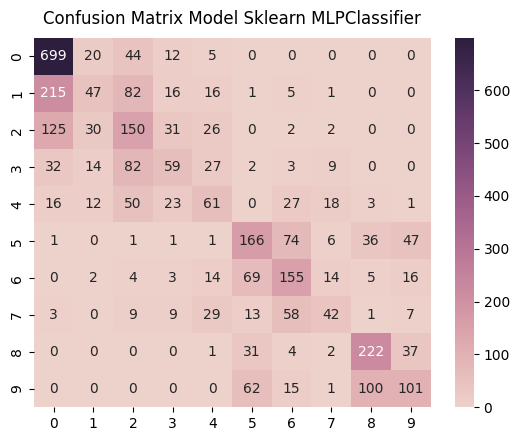

              precision    recall  f1-score      support
0.0            0.640697  0.896154  0.747194   780.000000
1.0            0.376000  0.122715  0.185039   383.000000
2.0            0.355450  0.409836  0.380711   366.000000
3.0            0.383117  0.258772  0.308901   228.000000
4.0            0.338889  0.289100  0.312020   211.000000
5.0            0.482558  0.498498  0.490399   333.000000
6.0            0.451895  0.549645  0.496000   282.000000
7.0            0.442105  0.245614  0.315789   171.000000
8.0            0.604905  0.747475  0.668675   297.000000
9.0            0.483254  0.362007  0.413934   279.000000
accuracy       0.511111  0.511111  0.511111     0.511111
macro avg      0.455887  0.437982  0.431866  3330.000000
weighted avg   0.483758  0.511111  0.480644  3330.000000
Mean Squared Error:  2.260960960960961


In [18]:
predict = mlp.predict(x_train)

confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

model_report = classification_report(y_train, predict, output_dict=True)
print(pd.DataFrame(model_report).transpose())

print("Mean Squared Error: ", mean_squared_error(y_train, predict))

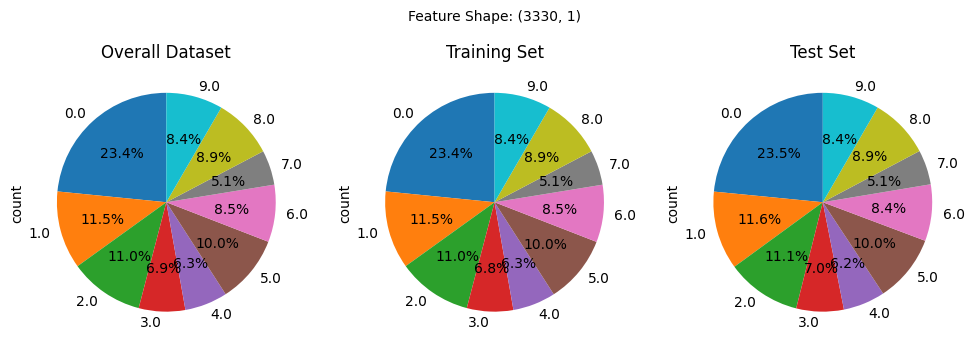

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


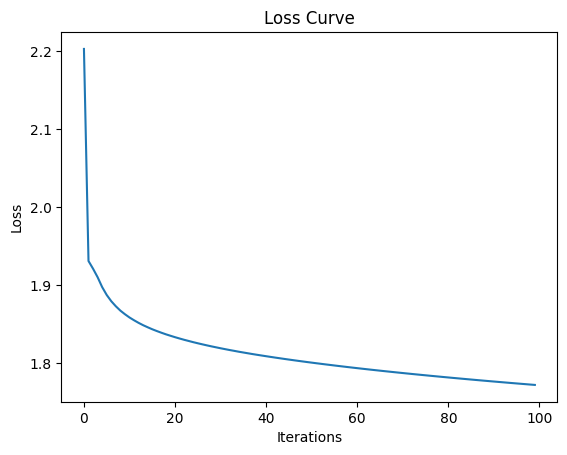

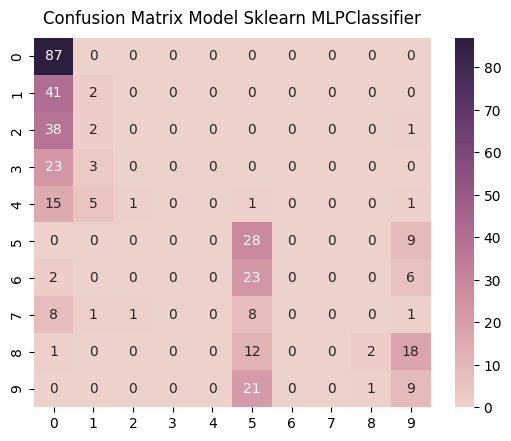

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score     support
0.0            0.404651  1.000000  0.576159   87.000000
1.0            0.153846  0.046512  0.071429   43.000000
2.0            0.000000  0.000000  0.000000   41.000000
3.0            0.000000  0.000000  0.000000   26.000000
4.0            0.000000  0.000000  0.000000   23.000000
5.0            0.301075  0.756757  0.430769   37.000000
6.0            0.000000  0.000000  0.000000   31.000000
7.0            0.000000  0.000000  0.000000   19.000000
8.0            0.666667  0.060606  0.111111   33.000000
9.0            0.200000  0.290323  0.236842   31.000000
accuracy       0.345013  0.345013  0.345013    0.345013
macro avg      0.172624  0.215420  0.142631  371.000000
weighted avg   0.218760  0.345013  0.216023  371.000000
Mean Squared Error:  5.62533692722372


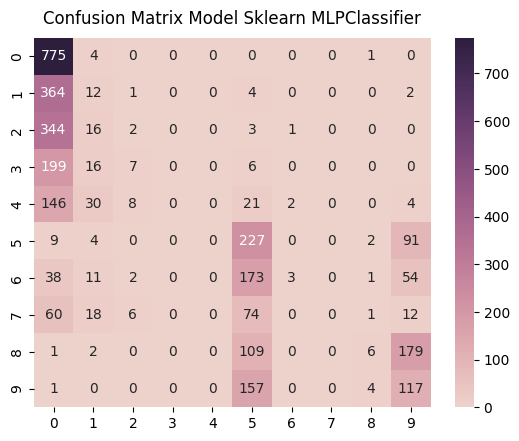

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score      support
0.0            0.400103  0.993590  0.570482   780.000000
1.0            0.106195  0.031332  0.048387   383.000000
2.0            0.076923  0.005464  0.010204   366.000000
3.0            0.000000  0.000000  0.000000   228.000000
4.0            0.000000  0.000000  0.000000   211.000000
5.0            0.293282  0.681682  0.410117   333.000000
6.0            0.500000  0.010638  0.020833   282.000000
7.0            0.000000  0.000000  0.000000   171.000000
8.0            0.400000  0.020202  0.038462   297.000000
9.0            0.254902  0.419355  0.317073   279.000000
accuracy       0.342943  0.342943  0.342943     0.342943
macro avg      0.203140  0.216226  0.141556  3330.000000
weighted avg   0.243089  0.342943  0.213085  3330.000000
Mean Squared Error:  5.6504504504504505


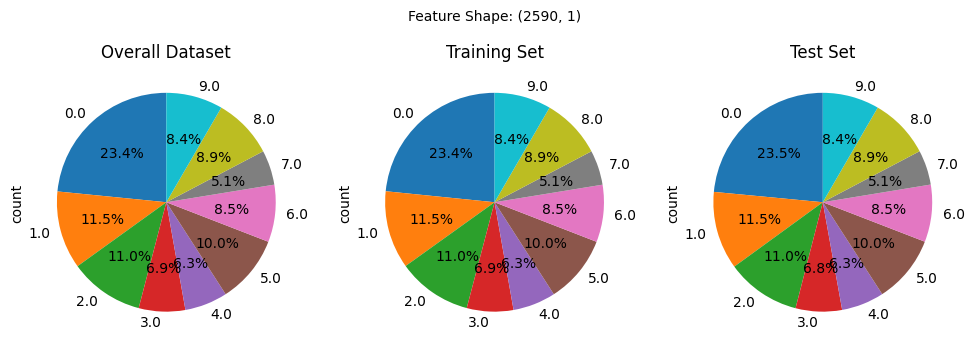

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


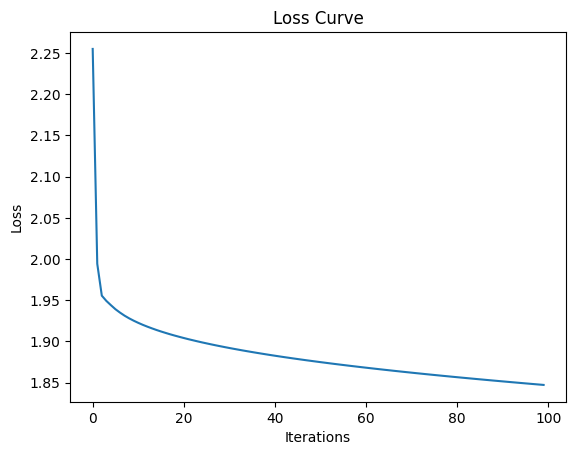

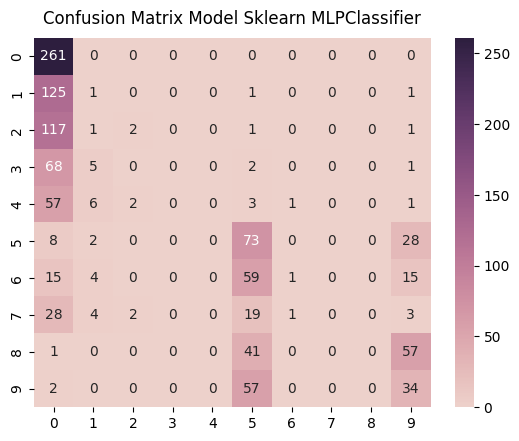

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score      support
0.0            0.382698  1.000000  0.553552   261.000000
1.0            0.043478  0.007812  0.013245   128.000000
2.0            0.333333  0.016393  0.031250   122.000000
3.0            0.000000  0.000000  0.000000    76.000000
4.0            0.000000  0.000000  0.000000    70.000000
5.0            0.285156  0.657658  0.397820   111.000000
6.0            0.333333  0.010638  0.020619    94.000000
7.0            0.000000  0.000000  0.000000    57.000000
8.0            0.000000  0.000000  0.000000    99.000000
9.0            0.241135  0.365591  0.290598    93.000000
accuracy       0.334833  0.334833  0.334833     0.334833
macro avg      0.161913  0.205809  0.130708  1111.000000
weighted avg   0.208395  0.334833  0.200816  1111.000000
Mean Squared Error:  6.432943294329433


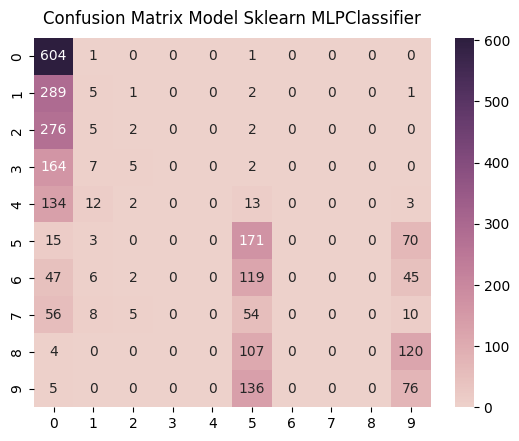

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score      support
0.0            0.378921  0.996700  0.549091   606.000000
1.0            0.106383  0.016779  0.028986   298.000000
2.0            0.117647  0.007018  0.013245   285.000000
3.0            0.000000  0.000000  0.000000   178.000000
4.0            0.000000  0.000000  0.000000   164.000000
5.0            0.281713  0.660232  0.394919   259.000000
6.0            0.000000  0.000000  0.000000   219.000000
7.0            0.000000  0.000000  0.000000   133.000000
8.0            0.000000  0.000000  0.000000   231.000000
9.0            0.233846  0.350230  0.280443   217.000000
accuracy       0.331274  0.331274  0.331274     0.331274
macro avg      0.111851  0.203096  0.126668  2590.000000
weighted avg   0.161608  0.331274  0.196256  2590.000000
Mean Squared Error:  6.4393822393822395


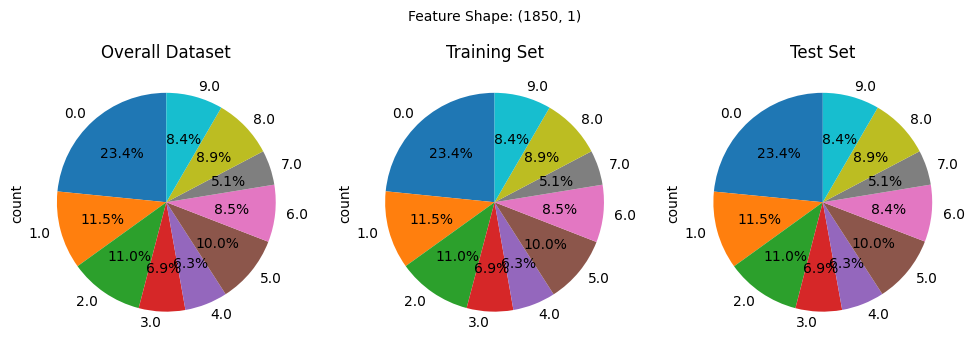

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


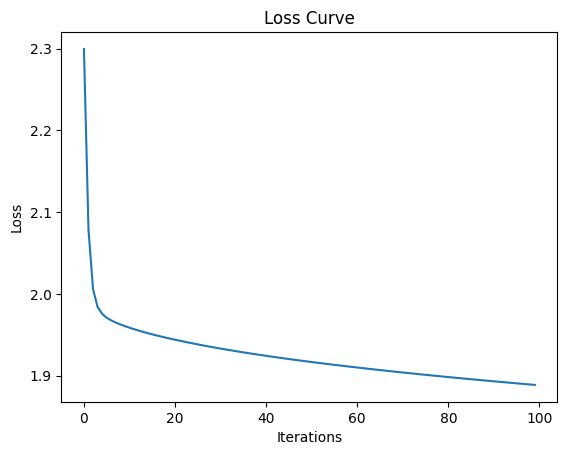

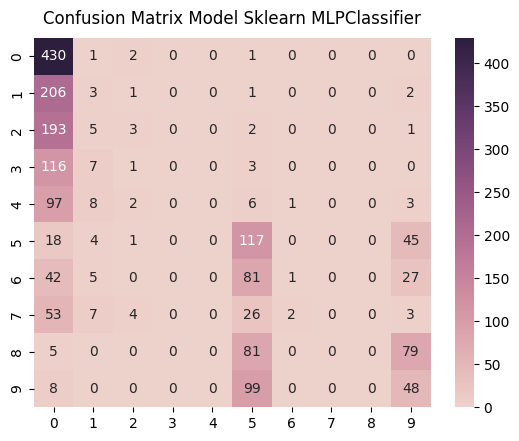

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score     support
0.0            0.368151  0.990783  0.536829   434.00000
1.0            0.075000  0.014085  0.023715   213.00000
2.0            0.214286  0.014706  0.027523   204.00000
3.0            0.000000  0.000000  0.000000   127.00000
4.0            0.000000  0.000000  0.000000   117.00000
5.0            0.280576  0.632432  0.388704   185.00000
6.0            0.250000  0.006410  0.012500   156.00000
7.0            0.000000  0.000000  0.000000    95.00000
8.0            0.000000  0.000000  0.000000   165.00000
9.0            0.230769  0.309677  0.264463   155.00000
accuracy       0.325230  0.325230  0.325230     0.32523
macro avg      0.141878  0.196809  0.125373  1851.00000
weighted avg   0.187003  0.325230  0.193680  1851.00000
Mean Squared Error:  7.3808752025931925


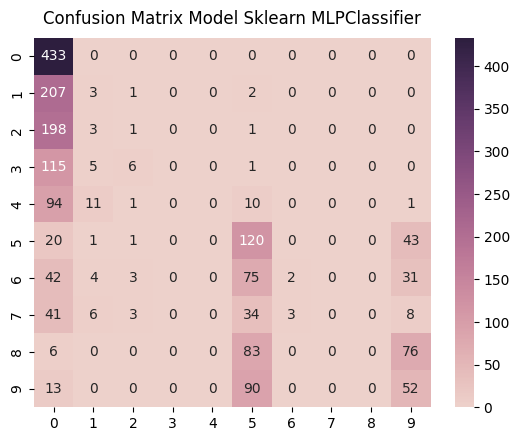

              precision    recall  f1-score     support
0.0            0.370402  1.000000  0.540574   433.00000
1.0            0.090909  0.014085  0.024390   213.00000
2.0            0.062500  0.004926  0.009132   203.00000
3.0            0.000000  0.000000  0.000000   127.00000
4.0            0.000000  0.000000  0.000000   117.00000
5.0            0.288462  0.648649  0.399334   185.00000
6.0            0.400000  0.012739  0.024691   157.00000
7.0            0.000000  0.000000  0.000000    95.00000
8.0            0.000000  0.000000  0.000000   165.00000
9.0            0.246445  0.335484  0.284153   155.00000
accuracy       0.330270  0.330270  0.330270     0.33027
macro avg      0.145872  0.201588  0.128228  1850.00000
weighted avg   0.187459  0.330270  0.196170  1850.00000
Mean Squared Error:  7.107567567567568


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [19]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)
    s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
    s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

    sorted_train = s_train['Satisfaction'].value_counts().sort_index()
    sorted_test = s_test['Satisfaction'].value_counts().sort_index()
    sorted_data = data['Satisfaction'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    #! edit mulai disini
    mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), 
                        max_iter=100, activation='relu', solver='sgd', random_state=42,
                        learning_rate_init=0.01, learning_rate='invscaling')
    mlp.fit(x_train, y_train)
    #! sampe sini

    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

    predict = mlp.predict(x_test)
    confussion_matrix = confusion_matrix(y_test, predict)
    plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

    model1_report = classification_report(y_test, predict, output_dict=True)
    print(pd.DataFrame(model1_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_test, predict))

    predict = mlp.predict(x_train)
    confusion_matrix_result = confusion_matrix(y_train, predict)
    plot_cm(confusion_matrix_result, 'Model Sklearn MLPClassifier')

    model_report = classification_report(y_train, predict, output_dict=True)
    print(pd.DataFrame(model_report).transpose())

    print("Mean Squared Error: ", mean_squared_error(y_train, predict))

    